<a href="https://colab.research.google.com/github/DavorJordacevic/TensorFlow-Keras-Neural-Networks/blob/master/TensorFlow_Cat_vs_Dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [0]:
import os
import zipfile
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from tensorflow.keras import Model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, Activation
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O cats_and_dogs_filtered.zip

--2019-12-13 00:13:04--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.126.128, 2a00:1450:4013:c05::80
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.126.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M   324MB/s    in 0.2s    

2019-12-13 00:13:04 (324 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [0]:
with zipfile.ZipFile("cats_and_dogs_filtered.zip","r") as zip_ref:
    zip_ref.extractall()

In [0]:
base_dir = 'cats_and_dogs_filtered'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [6]:
train_cat_file_names = os.listdir(train_cats_dir)
train_cat_file_names.sort()
print(train_cat_file_names[:10])

train_dog_file_names = os.listdir(train_dogs_dir)
train_dog_file_names.sort()
print(train_dog_file_names[:10])

validation_cats_file_names = os.listdir(validation_cats_dir)
validation_cats_file_names.sort()
print(validation_cats_file_names[:10])

validation_dogs_file_names = os.listdir(validation_dogs_dir)
validation_dogs_file_names.sort()
print(validation_dogs_file_names[:10])

['cat.0.jpg', 'cat.1.jpg', 'cat.10.jpg', 'cat.100.jpg', 'cat.101.jpg', 'cat.102.jpg', 'cat.103.jpg', 'cat.104.jpg', 'cat.105.jpg', 'cat.106.jpg']
['dog.0.jpg', 'dog.1.jpg', 'dog.10.jpg', 'dog.100.jpg', 'dog.101.jpg', 'dog.102.jpg', 'dog.103.jpg', 'dog.104.jpg', 'dog.105.jpg', 'dog.106.jpg']
['cat.2000.jpg', 'cat.2001.jpg', 'cat.2002.jpg', 'cat.2003.jpg', 'cat.2004.jpg', 'cat.2005.jpg', 'cat.2006.jpg', 'cat.2007.jpg', 'cat.2008.jpg', 'cat.2009.jpg']
['dog.2000.jpg', 'dog.2001.jpg', 'dog.2002.jpg', 'dog.2003.jpg', 'dog.2004.jpg', 'dog.2005.jpg', 'dog.2006.jpg', 'dog.2007.jpg', 'dog.2008.jpg', 'dog.2009.jpg']


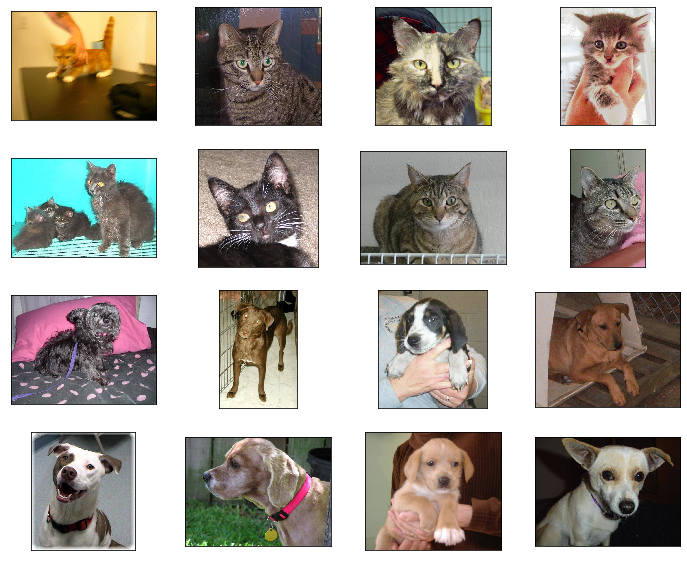

In [7]:
picture_index = 8
next_cat = [os.path.join(train_cats_dir, fname) 
                for fname in train_cat_file_names[picture_index-8:picture_index]]
next_dog = [os.path.join(train_dogs_dir, fname) 
                for fname in train_dog_file_names[picture_index-8:picture_index]]

plt.figure(figsize=(12,10))
for i, img_path in enumerate(next_cat + next_dog):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(mpimg.imread(img_path))
plt.show()

In [0]:
class Create_model(Model):
  def __init__(self, chanDim=-1):
    super(Create_model, self).__init__()
    self.conv1A = Conv2D(16, 3, input_shape = (150, 150, 3))
    self.act1A  = Activation("relu")
    self.pool1A = MaxPooling2D(2)
    self.conv1B = Conv2D(32, 3)
    self.act1B  = Activation("relu")
    self.pool1B = MaxPooling2D(pool_size=(2, 2))
    self.conv1C = Conv2D(64, 3)
    self.act1C  = Activation("relu")
    self.pool1C = MaxPooling2D(2)
    
    self.flatten = Flatten()
    self.dense2A = Dense(512)
    self.act2A  = Activation("relu")
    self.dense2B = Dense(1)
    self.sigmoid  = Activation("sigmoid")
  
  def call(self, inputs):
    x = self.conv1A(inputs)
    x = self.act1A(x)
    x = self.pool1A(x)
    x = self.conv1B(x)
    x = self.act1B(x)
    x = self.pool1B(x)
    x = self.conv1C(x)
    x = self.act1C(x)
    x = self.pool1C(x)
    
    x = self.flatten(x)
    x = self.dense2A(x)
    x = self.act2A(x)
    x = self.dense2B(x)
    x = self.sigmoid(x)
    
    return x

In [0]:
model = Create_model()

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

In [10]:
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [11]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=15,
      validation_data=validation_generator,
      validation_steps=50,
      verbose=2)

Epoch 1/15
100/100 - 17s - loss: 1.0112 - acc: 0.5367 - val_loss: 0.6331 - val_acc: 0.6410
Epoch 2/15
100/100 - 10s - loss: 0.6413 - acc: 0.6382 - val_loss: 0.5714 - val_acc: 0.7050
Epoch 3/15
100/100 - 9s - loss: 0.5498 - acc: 0.7208 - val_loss: 0.5657 - val_acc: 0.7180
Epoch 4/15
100/100 - 9s - loss: 0.4688 - acc: 0.7757 - val_loss: 0.6413 - val_acc: 0.6540
Epoch 5/15
100/100 - 9s - loss: 0.4001 - acc: 0.8187 - val_loss: 0.6348 - val_acc: 0.6950
Epoch 6/15
100/100 - 9s - loss: 0.3205 - acc: 0.8672 - val_loss: 0.7160 - val_acc: 0.7040
Epoch 7/15
100/100 - 9s - loss: 0.2309 - acc: 0.9207 - val_loss: 1.0362 - val_acc: 0.6750
Epoch 8/15
100/100 - 9s - loss: 0.1659 - acc: 0.9269 - val_loss: 0.7862 - val_acc: 0.7270
Epoch 9/15
100/100 - 9s - loss: 0.1383 - acc: 0.9552 - val_loss: 0.8439 - val_acc: 0.7310
Epoch 10/15
100/100 - 9s - loss: 0.0734 - acc: 0.9778 - val_loss: 1.2732 - val_acc: 0.7120
Epoch 11/15
100/100 - 9s - loss: 0.0677 - acc: 0.9784 - val_loss: 1.2736 - val_acc: 0.7160
Epoch 

Text(0.5, 1.0, 'Training and validation loss')

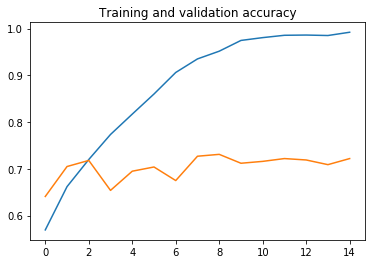

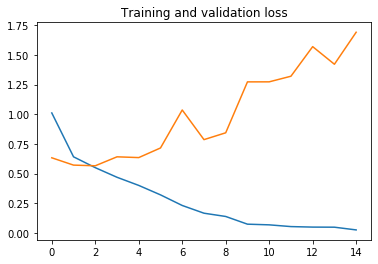

In [12]:
accuracy = history.history['acc']
val_accuracy = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))

plt.plot(epochs, accuracy)
plt.plot(epochs, val_accuracy)
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')

In [0]:
############################################

In [0]:
# Data Augmentation

In [15]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


![Mirroring](http://media5.datahacker.rs/2018/11/mirroring_ispr.jpg)

![Random cropping](http://media5.datahacker.rs/2018/11/random-cropping-768x330.jpg)

![Color shifting](http://media5.datahacker.rs/2018/11/color_shifting_a.jpg)

In [0]:
class Create_model(Model):
  def __init__(self, chanDim=-1):
    super(Create_model, self).__init__()
    self.conv1A = Conv2D(16, 3, input_shape = (150, 150, 3))
    self.act1A  = Activation("relu")
    self.pool1A = MaxPooling2D(2)
    self.conv1B = Conv2D(32, 3)
    self.act1B  = Activation("relu")
    self.pool1B = MaxPooling2D(pool_size=(2, 2))
    self.conv1C = Conv2D(64, 3)
    self.act1C  = Activation("relu")
    self.pool1C = MaxPooling2D(2)
    
    self.flatten = Flatten()
    self.dense2A = Dense(512)
    self.act2A  = Activation("relu")
    self.dropout = Dropout(0.5)
    self.dense2B = Dense(1)
    self.sigmoid  = Activation("sigmoid")
  
  def call(self, inputs):
    x = self.conv1A(inputs)
    x = self.act1A(x)
    x = self.pool1A(x)
    x = self.conv1B(x)
    x = self.act1B(x)
    x = self.pool1B(x)
    x = self.conv1C(x)
    x = self.act1C(x)
    x = self.pool1C(x)
    
    x = self.flatten(x)
    x = self.dense2A(x)
    x = self.act2A(x)
    x = self.dropout(x)
    x = self.dense2B(x)
    x = self.sigmoid(x)
    
    return x

In [0]:
model = Create_model()

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

In [18]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,  # 2000 slika = batch_size * steps
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 slika = batch_size * steps
      verbose=2)

Epoch 1/30
100/100 - 19s - loss: 1.1230 - acc: 0.5000 - val_loss: 0.6671 - val_acc: 0.5720
Epoch 2/30
100/100 - 17s - loss: 0.7145 - acc: 0.5606 - val_loss: 0.6564 - val_acc: 0.5560
Epoch 3/30
100/100 - 17s - loss: 0.6704 - acc: 0.6091 - val_loss: 0.6322 - val_acc: 0.6330
Epoch 4/30
100/100 - 17s - loss: 0.6545 - acc: 0.6335 - val_loss: 0.7002 - val_acc: 0.6290
Epoch 5/30
100/100 - 17s - loss: 0.6485 - acc: 0.6368 - val_loss: 0.6446 - val_acc: 0.6520
Epoch 6/30
100/100 - 17s - loss: 0.6404 - acc: 0.6502 - val_loss: 0.5741 - val_acc: 0.6990
Epoch 7/30
100/100 - 17s - loss: 0.6220 - acc: 0.6729 - val_loss: 0.5986 - val_acc: 0.6890
Epoch 8/30
100/100 - 17s - loss: 0.6128 - acc: 0.6692 - val_loss: 0.5475 - val_acc: 0.7230
Epoch 9/30
100/100 - 17s - loss: 0.6046 - acc: 0.6783 - val_loss: 0.5540 - val_acc: 0.7180
Epoch 10/30
100/100 - 17s - loss: 0.6227 - acc: 0.6721 - val_loss: 0.5728 - val_acc: 0.7180
Epoch 11/30
100/100 - 17s - loss: 0.6003 - acc: 0.7018 - val_loss: 0.5802 - val_acc: 0.68

Text(0.5, 1.0, 'Training and validation loss')

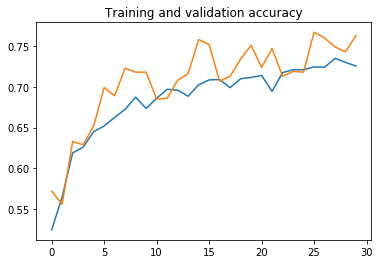

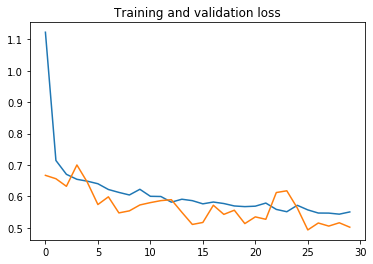

In [19]:
accuracy = history.history['acc']
val_accuracy = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))

plt.plot(epochs, accuracy)
plt.plot(epochs, val_accuracy)
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')



---

